In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fc_sim.toymodel import *
from fc_sim.fun import *
from fc_sim.camera import camera_description
from ctapipe.visualization import CameraDisplay


In [2]:
subarray = get_fc_subarray()

In [3]:
# Waveforms of random charge produced at the centre of the trace

waveform, subarray, tel_id, selected_gain_channel, charge, time = get_random_toy_waveforms(subarray, minCharge=100, maxCharge=1000, n_samples=128)


# Noise

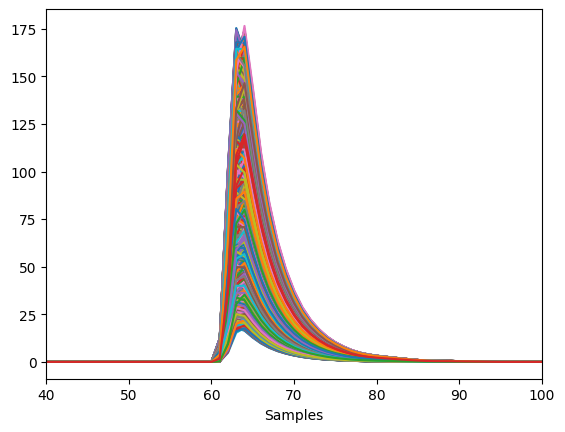

In [4]:
plt.figure()

plt.plot(waveform.T)

plt.xlim(40, 100)
plt.xlabel("Samples")
plt.show()

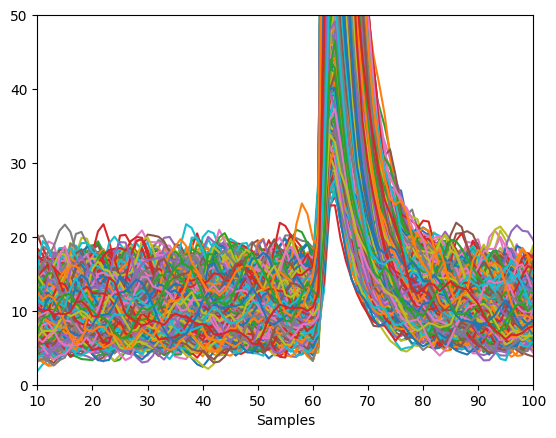

In [5]:
# Adding_nsb

nsb_waveform, nsb_charge, nsb_time = simulate_nsb(600)
nsb_waveform = nsb_waveform + waveform

plt.figure()

plt.plot(nsb_waveform.T)

plt.ylim(0, 50)
plt.xlim(10, 100)
plt.xlabel("Samples")
plt.show()

/tmp/ipykernel_19670/2516187276.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.hist(np.array(nsb_time)[0], bins=50)
/tmp/ipykernel_19670/2516187276.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.hist(np.array(nsb_time)[1], bins=50)


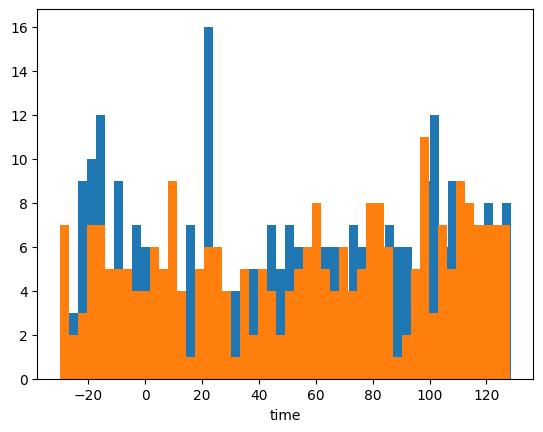

In [6]:
plt.figure()

plt.hist(np.array(nsb_time)[0], bins=50)
plt.hist(np.array(nsb_time)[1], bins=50)

plt.xlabel("time")
plt.show()


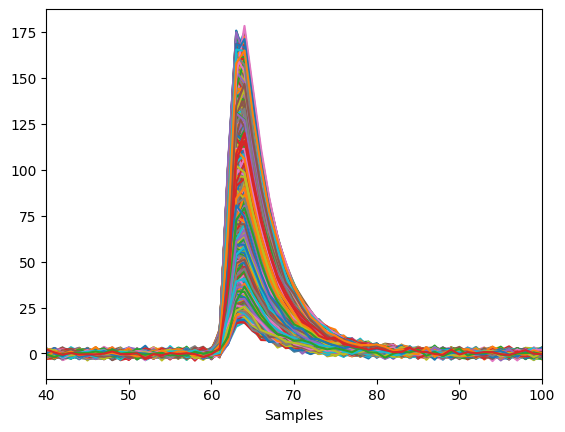

In [7]:
# Adding gaussian noise

noisy_waveform = GaussianNoise().add_to_readout(waveform)

plt.figure()

plt.plot(noisy_waveform.T)

plt.xlim(40, 100)
plt.xlabel("Samples")
plt.show()

# Broken pixels

In [4]:
image, signal, noise, time = get_toy_image(1*u.rad, 0*u.m, 0*u.m, 0.06*u.m, 0.3*u.m, 1000, 10*u.ns/u.m, 1*u.ns, subarray, nsb_level_pe=3)


In [5]:
geometry = subarray.tel[10].camera.geometry
broken_pixels = broken_pixels(geometry).camera_border(1)


Text(76.09722222222221, 0.5, 'y / m')

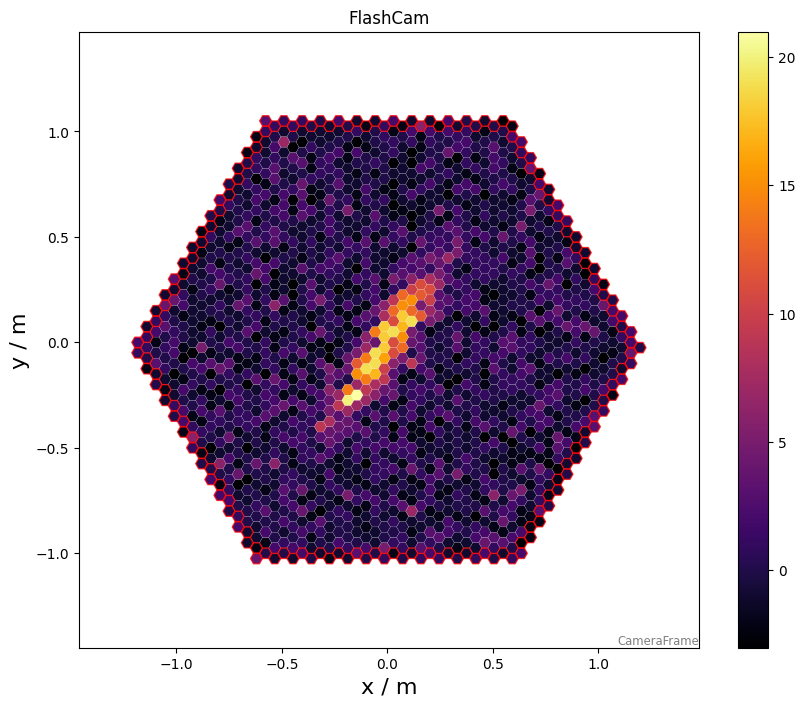

In [10]:

fig, ax = plt.subplots(figsize=(10, 8))

display = CameraDisplay(geometry)

display.image = image
display.add_colorbar()
display.highlight_pixels(broken_pixels, color="red", linewidth=1)

plt.xlabel('x / m', fontsize=16)
plt.ylabel('y / m', fontsize=16)


Text(76.09722222222221, 0.5, 'y / m')

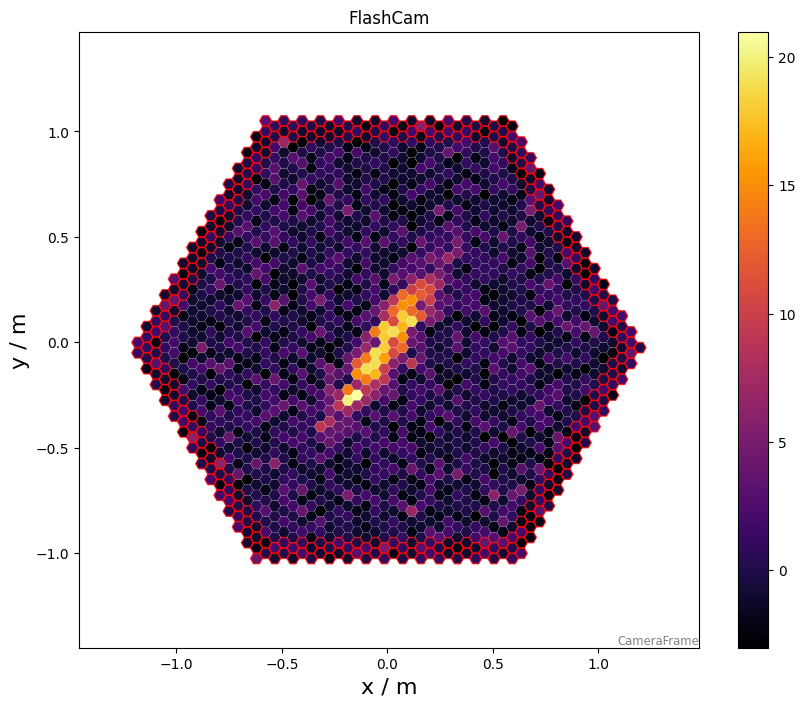

In [11]:

geometry = subarray.tel[10].camera.geometry
broken_pixels = broken_pixels(geometry).camera_border(2)

fig, ax = plt.subplots(figsize=(10, 8))

display = CameraDisplay(geometry)

display.image = image
display.add_colorbar()
display.highlight_pixels(broken_pixels, color="red", linewidth=1)

plt.xlabel('x / m', fontsize=16)
plt.ylabel('y / m', fontsize=16)


Text(76.09722222222221, 0.5, 'y / m')

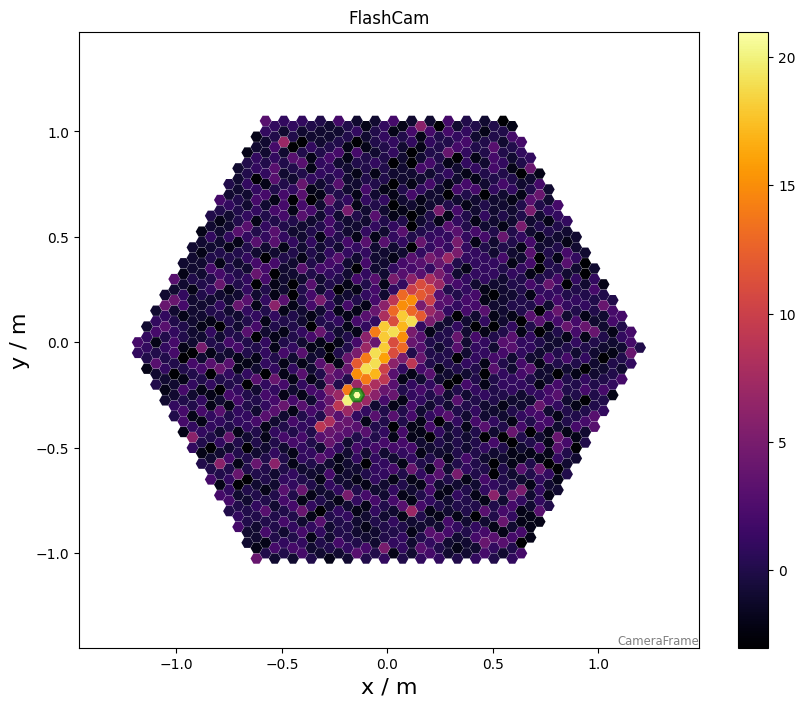

In [14]:

broken_pixels = broken_pixels(geometry).brightest_pix(image, geometry, n=1, neighbors=False)

fig, ax = plt.subplots(figsize=(10, 8))

display = CameraDisplay(geometry)

display.image = image
display.add_colorbar()
display.highlight_pixels(broken_pixels, color="green", linewidth=3)

plt.xlabel('x / m', fontsize=16)
plt.ylabel('y / m', fontsize=16)


Text(76.09722222222221, 0.5, 'y / m')

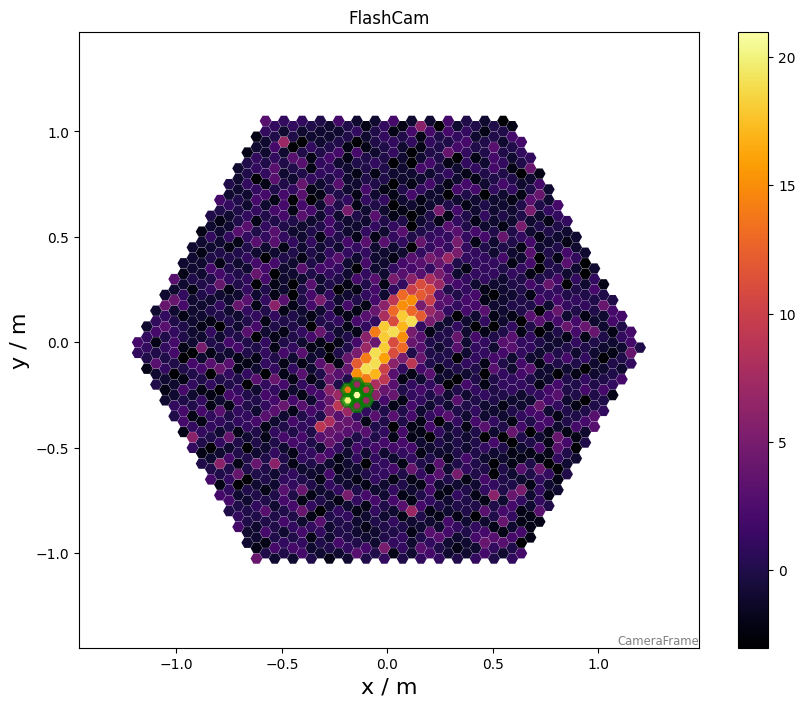

In [15]:
broken_pixels = broken_pixels(geometry).brightest_pix(image, geometry, n=3, neighbors=True)

fig, ax = plt.subplots(figsize=(10, 8))

display = CameraDisplay(geometry)

display.image = image
display.add_colorbar()
display.highlight_pixels(broken_pixels, color="green", linewidth=3)

plt.xlabel('x / m', fontsize=16)
plt.ylabel('y / m', fontsize=16)


Text(76.09722222222221, 0.5, 'y / m')

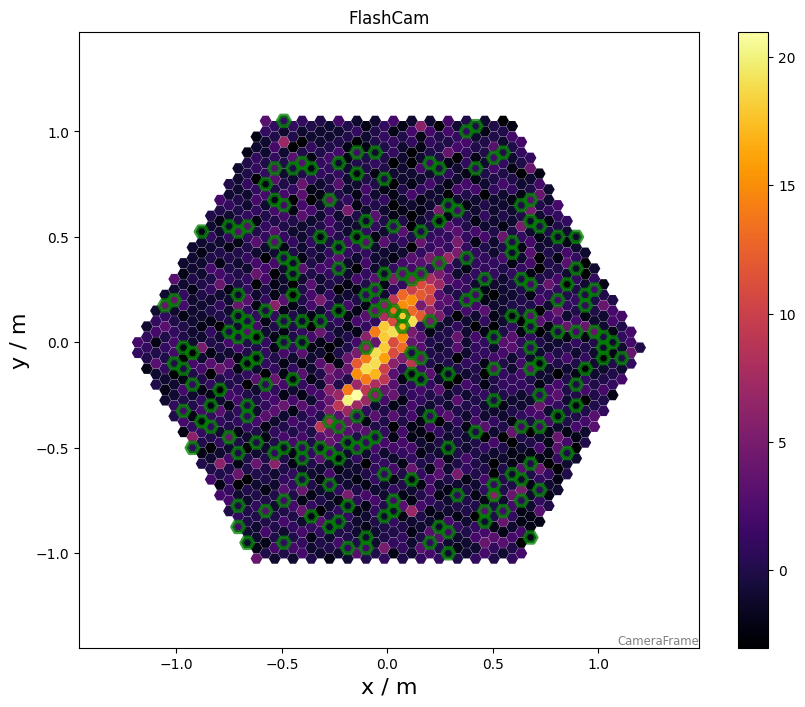

In [6]:
from fc_sim.fun import *
broken_pixels = broken_pixels(geometry).random_pix(200)

fig, ax = plt.subplots(figsize=(10, 8))

display = CameraDisplay(geometry)

display.image = image
display.add_colorbar()
display.highlight_pixels(broken_pixels, color="green", linewidth=3)

plt.xlabel('x / m', fontsize=16)
plt.ylabel('y / m', fontsize=16)
